In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seawater as csr
from matplotlib import cm

In [3]:
# read multiple files before hurrican came
import os
path1="/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/argo_200704/before/"
files_1=os.listdir(path1)
files2=files_1[:]


def hasNumber(inputString):
    return any(char.isdigit() for char in inputString)   # if there is a digit in a string, and, should start with D
for file in files_1:
    if not hasNumber(file) or not file.startswith('D'):
        files2.remove(file)         # remove all the items has no digit 
files_1=files2
len(files_1)
files_1[0]

'D1900426_109.nc'

In [6]:
nc1=Dataset(path1+files_1[1])
nc1.set_auto_mask(False)
date0 = datetime.strptime((nc1.variables['REFERENCE_DATE_TIME'][:]).tostring().decode('utf-8'),"%Y%m%d%H%M%S")


In [151]:
date_1=[]
lat_1=[]
lon_1=[]
temp_1=[]
salt_1=[]
press_1=[]
file_name_1=[]
for file in files_1:
    if not os.path.isdir(file):
        f=Dataset(path1+"/"+file)
        f.set_auto_mask(False)
        pres_f=f.variables['PRES'][0][1]
        if round(pres_f)==10.0:
#             print(file)
            file_name_1.append(file)
            press_1.append(pres_f)
            date_f=date0+timedelta(days=f.variables['JULD'][:][0])       #deal with the datetime
            date_1.append(date_f)
            lat_f=f.variables['LATITUDE'][:]
            lat_1.append(lat_f[0])
            lon_f=f.variables['LONGITUDE'][:]
            lon_1.append(lon_f[0])
            temp_f=f.variables['TEMP'][:]
            temp_1.append(temp_f[0])
            salt_f=f.variables['PSAL'][:]
            salt_1.append(salt_f[0])
            t_1=-f.variables['PRES'][:][0]

days_1=[date_f.day for date_f in date_1] 
lon_1=[int(round(lonr)) for lonr in lon_1]
lat_1=[int(round(latr)) for latr in lat_1]
a_1=len(lon_1)
b_1=len(temp_1[0][:])

t_1[0:14]

array([ -5., -10., -15., -20., -25., -30., -35., -40., -45., -50., -55.,
       -60., -65., -70.], dtype=float32)

In [137]:

for ind, lon in enumerate (lon_1):
    if lon>-50 and lat[ind]>10:
        print(str(ind)+" "+str(lon)+" "+str(lat[ind])+" "+str(days_1[ind]))

2 -34 14 11
3 -35 14 12
4 -29 14 12
5 -34 18 10
9 -29 12 11
13 -24 17 11
14 -27 13 10
16 -27 17 11
17 -25 12 12
24 -34 13 12
25 -38 14 12
27 -47 17 13
31 -45 17 14
34 -46 17 13


In [155]:
for ind, lon in enumerate (lon_1):
    if lon<-45 and lat[ind]<10:
        print(str(ind)+" "+str(lon)+" "+str(lat[ind])+" "+str(days_1[ind])+" "+str(file_name_1[ind]))

28 -58 9 13 D4900750_056.nc


### input data after hurricane 

In [9]:
import os
path2="/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/argo_200704/after/"
files2=os.listdir(path2)
files22=files2[:]
print(len(files22))

def hasNumber(inputString):
    return any(char.isdigit() for char in inputString)   # if there is a digit in a string, and, should start with D
for file in files2:
    if not hasNumber(file) or not file.startswith('D'):
        files22.remove(file)         # remove all the items has no digit 
files_2=files22
len(files_2)


87


86

In [140]:
files_2[0]

'D1900249_153.nc'

In [10]:
nc2=Dataset(path2+files_2[1])
nc2.set_auto_mask(False)
date0 = datetime.strptime((nc2.variables['REFERENCE_DATE_TIME'][:]).tostring().decode('utf-8'),"%Y%m%d%H%M%S")



In [158]:
date_2=[]
lat_2=[]
lon_2=[]
temp_2=[]
salt_2=[]
press_2=[]
file_name_2=[]
for file in files_2:
    
    if not os.path.isdir(file):
        f=Dataset(path2+"/"+file)
        f.set_auto_mask(False)
        pres_f=f.variables['PRES'][0][1]
        if round(pres_f)==10.0:
#             print(file)
            file_name_2.append(file)
            press_2.append(pres_f)
            date_f=date0+timedelta(days=f.variables['JULD'][:][0])       #deal with the datetime
            date_2.append(date_f)
            lat_f=f.variables['LATITUDE'][:]
            lat_2.append(lat_f[0])
            lon_f=f.variables['LONGITUDE'][:]
            lon_2.append(lon_f[0])
            temp_f=f.variables['TEMP'][:]
            temp_2.append(temp_f[0])
            salt_f=f.variables['PSAL'][:]
            salt_2.append(salt_f[0])
            t_2=-f.variables['PRES'][:][0]


days_2=[date_f.day for date_f in date_2] 
lon_2=[int(round(lonr)) for lonr in lon_2]
lat_2=[int(round(latr)) for latr in lat_2]
a_2=len(lon_2)
b_2=len(temp_2[0][:])


In [160]:
print(lon_2)

[-18, -23, -34, -35, -29, -46, -24, -34, -22, -8, -15, -29, -21, -25, -34, -42, -41, -29, -16, -34, -26, -24, -27, -30, -27, -25, -28, -20, -29, -41, -46, -26, -34, -43, -22, -34, -45, -55, -34, -39, -53, -47, -59, -54, -51, -58, -65, -55, -55, -45, -39, -52, -57, -46, -50]


In [153]:
for ind, lon in enumerate (lon_1):
    if lon>-50 and lat_1[ind]>10:
        print(str(ind)+" "+str(lon)+" "+str(lat_1[ind])+" "+str(days_1[ind])+" "+str(file_name_1[ind]))

2 -34 14 11 D1900428_109.nc
3 -35 14 12 D1900429_109.nc
4 -29 14 12 D1900430_109.nc
5 -34 18 10 D1900505_086.nc
9 -29 12 11 D1900710_046.nc
13 -24 17 11 D1900716_042.nc
14 -27 13 10 D1900737_032.nc
16 -27 17 11 D1900765_014.nc
17 -25 12 12 D1900766_014.nc
24 -34 13 12 D4900615_079.nc
25 -38 14 12 D4900616_079.nc
27 -47 17 13 D4900618_079.nc
31 -45 17 14 D4900758_047.nc
34 -46 17 13 D4900819_014.nc


In [166]:
for ind, lon in enumerate (lon_2):
    if lon<-50 and 15<lat_2[ind]<20 and salt_2[ind][0]<35.8:
        print(str(ind)+" "+str(lon)+" "+str(lat_2[ind])+" "+str(days_2[ind])+" "+str(file_name_2[ind]))
        

37 -55 17 23 D4900572_114.nc
46 -65 17 21 D4900754_048.nc
48 -55 16 23 D4900756_048.nc
52 -57 17 20 D4900818_015.nc


In [168]:
# river mouth
for ind, lon in enumerate (lon_1):
    if lon<-50 and lat_1[ind]<10 and salt_1[ind][0]<35.8:
        print(str(ind)+" "+str(lon)+" "+str(lat_1[ind])+" "+str(days_1[ind])+" "+str(file_name_1[ind]))
        

28 -58 9 13 D4900750_056.nc


In [154]:
for ind, lon in enumerate (lon_2):
    if lon>-50 and lat_2[ind]>10:
        print(str(ind)+" "+str(lon)+" "+str(lat_2[ind])+" "+str(days_2[ind])+" "+str(file_name_2[ind]))

2 -34 15 21 D1900428_110.nc
3 -35 14 22 D1900429_110.nc
4 -29 15 22 D1900430_110.nc
6 -24 12 19 D1900503_087.nc
7 -34 18 20 D1900505_087.nc
15 -42 15 16 D1900707_047.nc
16 -41 16 16 D1900708_047.nc
17 -29 12 21 D1900710_047.nc
21 -24 17 21 D1900716_043.nc
22 -27 13 20 D1900737_033.nc
24 -27 17 21 D1900765_015.nc
25 -25 12 22 D1900766_015.nc
28 -29 20 16 D1900775_007.nc
38 -34 13 22 D4900615_080.nc
39 -39 14 22 D4900616_080.nc
41 -47 17 23 D4900618_080.nc
49 -45 17 24 D4900758_048.nc
50 -39 17 15 D4900759_047.nc
53 -46 17 23 D4900819_015.nc


### Plot 

In [118]:
# draw the profile of two temps
temp=temp_1
salt=salt_1
length=a_1
lon=lon_1
lat=lat_1
t=t_1[0:20]
salt[0]

array([34.916, 34.974, 34.976, 34.981, 34.989, 34.998, 35.003, 35.009,
       35.038, 35.295, 35.307, 35.316, 35.518, 35.814, 35.816, 35.753,
       35.684, 35.631, 35.591, 35.569, 35.559, 35.546, 35.53 , 35.516,
       35.492, 35.48 , 35.472, 35.464, 35.455, 35.441, 35.432, 35.418,
       35.409, 35.395, 35.383, 35.372, 35.358, 35.347, 35.334, 35.319,
       35.285, 35.235, 35.198, 35.152, 35.099, 35.052, 35.035, 34.989,
       34.934, 34.881, 34.771, 34.734, 34.686, 34.656, 34.605, 34.586,
       34.541, 34.518, 34.518, 34.527, 34.549, 34.581, 34.626, 34.662,
       34.697, 34.726, 34.749, 34.776, 34.802, 34.819, 34.837, 34.848,
       34.853, 34.857, 34.863, 34.867, 34.871], dtype=float32)

36


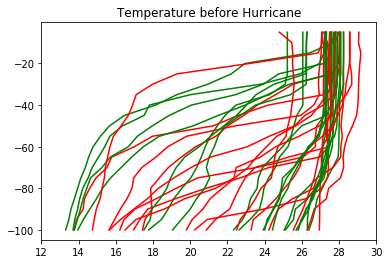

In [119]:
data1=np.empty([length,20])
data_noplume=[]
data_plume=[]
numb=0
for i in range(length):
    if len(temp[i])>20:
        numb=numb+1
        data1[i][0:20]=temp[i][0:20]
        if (salt[i][0]>35.8):
            data_noplume.append(data1[i])
            plt.plot(data1[i], t,linestyle='-',color='green',label=str(lon[i])+'W '+str(lat[i])+'N ')
        else:
            data_plume.append(data1[i])
            plt.plot(data1[i], t,linestyle='-',color='red',label=str(lon[i])+'W '+str(lat[i])+'N ')
plt.xlim(12, 30)
# plt.xlim(33, 40)
plt.title('Temperature before Hurricane')
# plt.title('Temperature After Hurricane')
# plt.title('Salinity After Hurricane')
# plt.title('Salinity Before Hurricane')
data_noplume_mean=sum(data_noplume)/len(data_noplume)
data_plume_mean=sum(data_plume)/len(data_plume)
print(numb)

Text(0.5,1,'Temperature before Hurricane')

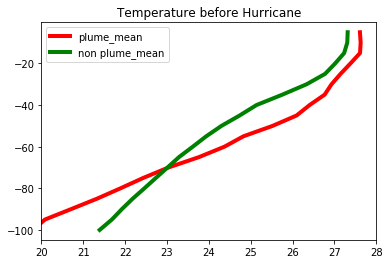

In [120]:
data_plume_mean
plt.plot(data_plume_mean, t,linestyle='-',lw=4,color='red',label='plume_mean')
plt.plot(data_noplume_mean, t,linestyle='-',lw=4,color='green',label='non plume_mean')
plt.legend()
plt.xlim(20, 28)
# plt.xlim(33, 40)
plt.title('Temperature before Hurricane')
# plt.title('Temperature After Hurricane')

# plt.title('Salinity After Hurricane')
# plt.title('Salinity Before Hurricane')

In [ ]:


data1=np.empty([a,20])
data_noplume=[]
data_plume=[]
ix=0
plume_ind=[]
noplume_ind=[]

for i in range(a):
    if salt[i][1]<salt[i][0]+4:
        ix=ix+1
        data1[i]=salt[i][0:20]
        if (lon[i]>-50) and (lat[i]>10):
            data_noplume.append(data1[i])
            plt.plot(data1[i], t,linestyle='-',color='green',label=str(lon[i])+'W '+str(lat[i])+'N ')
            noplume_ind.append(i)
        else:
            data_plume.append(data1[i])
            plt.plot(data1[i], t,linestyle='-',color='red',label=str(lon[i])+'W '+str(lat[i])+'N ')
            plume_ind.append(i)
plt.title('Salt ')
# plt.plot(data2, t,linestyle='solid',label='last day')
# plt.legend()
salt_noplume_mean=sum(data_noplume)/len(data_noplume)
salt_plume_mean=sum(data_plume)/len(data_plume)
salt[30][0:20]
# ind=30 is the plume area point 
# remove the ind=30, ind=24 points 

In [ ]:
noplume_ind

In [ ]:

plt.plot(salt_plume_mean, t,linestyle='-',color='red',label='plume_mean')
plt.plot(salt_noplume_mean, t,linestyle='-',color='green',label='on plume_mean')
plt.legend()

### after the hurricane 

In [ ]:
path2="/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/argo_200704/after/"
files=os.listdir(path2)
files2=files[:]


def hasNumber(inputString):
    return any(char.isdigit() for char in inputString)   # if there is a digit in a string, and, should start with D
for file in files:
    if not hasNumber(file) or not file.startswith('D'):
        files2.remove(file)         # remove all the items has no digit 
files_2=files2
len(files_2)